## Importing libraries


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC



## Loading in Data / Inspecting data

In [37]:
training_data = pd.read_csv('Training_DataSet.csv')
testing_data = pd.read_csv('Test_Dataset.csv')

In [ ]:
training_data.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [ ]:
training_data.columns

Index(['ListingID', 'SellerCity', 'SellerIsPriv', 'SellerListSrc',
       'SellerName', 'SellerRating', 'SellerRevCnt', 'SellerState',
       'SellerZip', 'VehBodystyle', 'VehCertified', 'VehColorExt',
       'VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehFuel',
       'VehHistory', 'VehListdays', 'VehMake', 'VehMileage', 'VehModel',
       'VehPriceLabel', 'VehSellerNotes', 'VehType', 'VehTransmission',
       'VehYear', 'Vehicle_Trim', 'Dealer_Listing_Price'],
      dtype='object')

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [ ]:
#making everythign lowercase
training_data = training_data.applymap(lambda x: x.lower() if type(x) == str  else x)
training_data.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,warren,False,inventory command center,prime motorz,5.0,32,mi,48091.0,suv,...,jeep,39319.0,grand cherokee,fair price,NaN,used,automatic 8-speed,2015,high altitude,30990.0
1,3920,fargo,False,cadillac certified program,gateway chevrolet cadillac,4.8,1456,nd,58103.0,suv,...,cadillac,30352.0,xt5,good deal,come take a look at our great pre-owned invent...,used,NaN,2017,NaN,34860.0
2,4777,waukesha,False,jeep certified program,wilde chrysler jeep dodge ram &amp; subaru,4.8,1405,wi,53186.0,suv,...,jeep,38957.0,grand cherokee,good deal,backed by a rigorous 125-point inspection by f...,used,8-speed automatic w/od,2015,laredo,23249.0
3,6242,wentzville,False,inventory command center,century dodge chrysler jeep ram,4.4,21,mo,63385.0,suv,...,jeep,20404.0,grand cherokee,good deal,drop by to see us and you will quickly see how...,used,automatic,2018,limited,31977.0
4,7108,fayetteville,False,homenet automotive,superior buick gmc of fayetteville,3.7,74,ar,72703.0,suv,...,cadillac,19788.0,xt5,good deal,"luxury, exterior parking camera rear, front du...",used,8-speed automatic,2018,luxury,33495.0


### Exploritory Data Analysis - looking at the data with visualizations

In [ ]:
len(training_data.columns)

29

<Axes: >

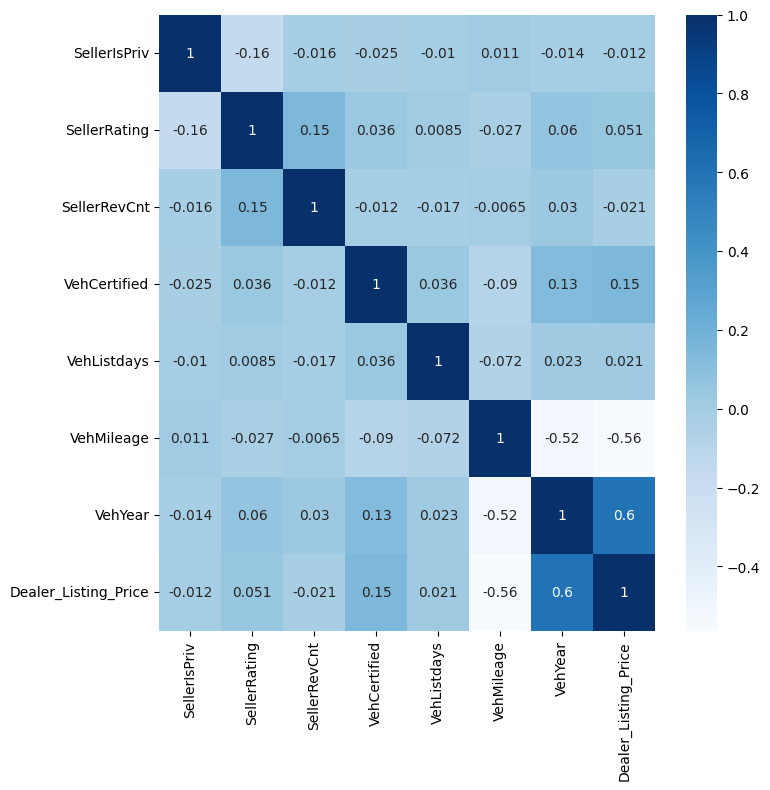

In [ ]:
plt.figure(figsize = (8,8))
relevant_columns = training_data.drop(['ListingID', 'SellerZip'], axis=1)
relevant_columns_2 = relevant_columns.columns
#removing the ListingID because it's a unique identifier
#removing SellerZip because nominal data that is a float
heatmap_data = training_data[relevant_columns_2].corr()


sns.heatmap(heatmap_data, cmap = 'Blues', annot = True)
# Important to note that this correlation graph excludes any non-numinal data

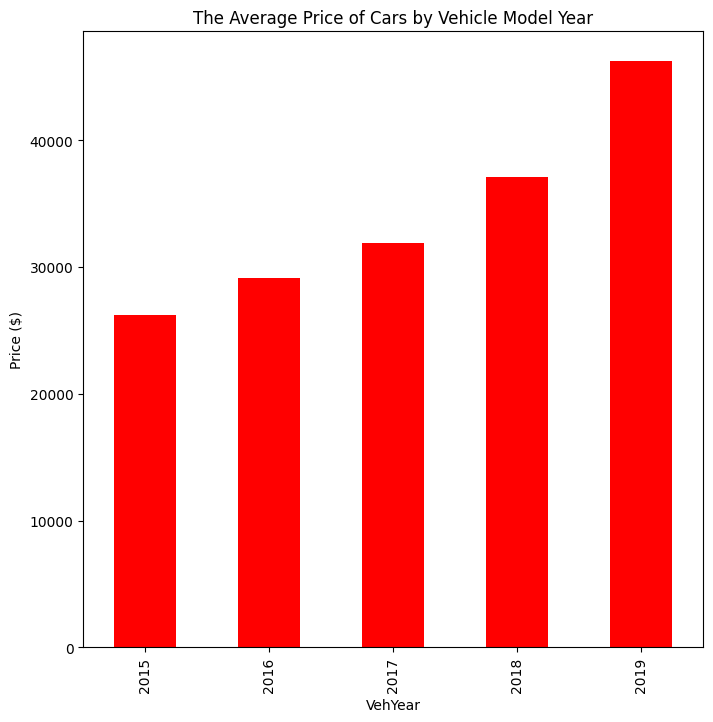

In [ ]:
# Vehicle Year has the strogest (positive) correlation, so vizualize data
plt.figure(figsize = (8, 8))
training_data.groupby('VehYear')['Dealer_Listing_Price'].mean().plot(kind = 'bar', color = 'r')
plt.ylabel('Price ($)')
plt.title("The Average Price of Cars by Vehicle Model Year", fontsize = 12)
plt.show()

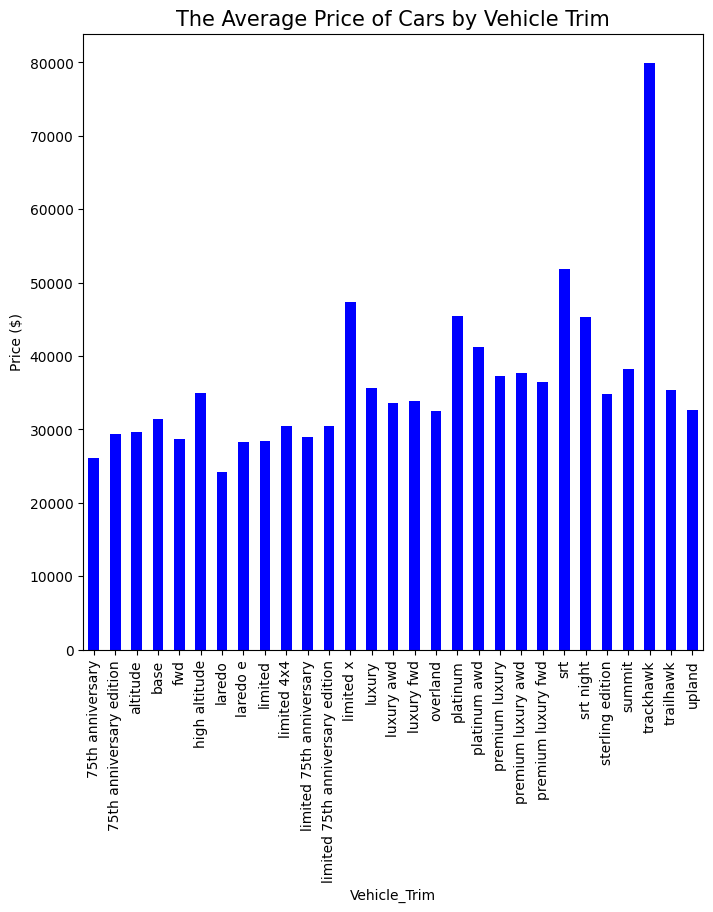

In [ ]:
plt.figure(figsize = (8, 8))
training_data.groupby('Vehicle_Trim')['Dealer_Listing_Price'].mean().plot(kind = 'bar', color = 'b')
plt.ylabel('Price ($)')
plt.title("The Average Price of Cars by Vehicle Trim", fontsize = 15)
plt.show()

# First, will be predicting Vehicle trim with the SVM model (Support Vector Machine)

In [ ]:
check_nulls = training_data['Vehicle_Trim'].isnull().sum()
not_nulls = training_data['Vehicle_Trim'].notnull().sum()
print('The number of values in the Vehicle_Trim column that are null is ', check_nulls)
print('The number of values in the Vehicle_Trim column that are not null is ', not_nulls)

The number of values in the Vehicle_Trim column that are null is  405
The number of values in the Vehicle_Trim column that are not null is  5893


### I will be throwing out the rows where the Vehicle_Trim is null because they won't help in training the model

In [ ]:
training_df_vt_clean = training_data.dropna(subset=['Vehicle_Trim'])
print(len(training_df_vt_clean))


5893


In [ ]:
x = training_df_vt_clean.drop(['Vehicle_Trim'], axis = 1)
y = (training_df_vt_clean['Vehicle_Trim'])

In [ ]:
x.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Dealer_Listing_Price
0,3287,warren,False,inventory command center,prime motorz,5.0,32,mi,48091.0,suv,...,8.600069,jeep,39319.0,grand cherokee,fair price,NaN,used,automatic 8-speed,2015,30990.0
2,4777,waukesha,False,jeep certified program,wilde chrysler jeep dodge ram &amp; subaru,4.8,1405,wi,53186.0,suv,...,28.107014,jeep,38957.0,grand cherokee,good deal,backed by a rigorous 125-point inspection by f...,used,8-speed automatic w/od,2015,23249.0
3,6242,wentzville,False,inventory command center,century dodge chrysler jeep ram,4.4,21,mo,63385.0,suv,...,59.816875,jeep,20404.0,grand cherokee,good deal,drop by to see us and you will quickly see how...,used,automatic,2018,31977.0
4,7108,fayetteville,False,homenet automotive,superior buick gmc of fayetteville,3.7,74,ar,72703.0,suv,...,98.665301,cadillac,19788.0,xt5,good deal,"luxury, exterior parking camera rear, front du...",used,8-speed automatic,2018,33495.0
5,10882,olean,False,digital motorworks (dmi),paul brown chrysler dodge jeep ram kia,3.0,51,ny,14760.0,suv,...,30.967500,jeep,34649.0,grand cherokee,good deal,priced below kbb fair purchase price! clean ca...,used,8-speed automatic,2018,27900.0


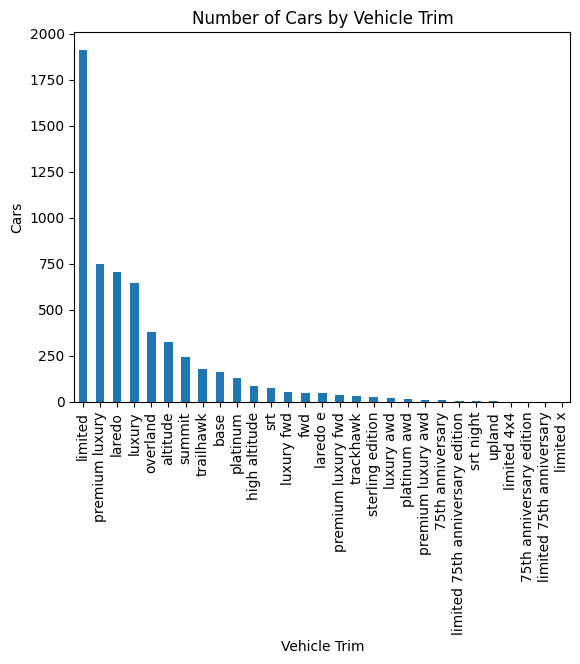

In [ ]:
show_plot = y.value_counts()
show_plot.plot(kind = 'bar')

plt.xlabel('Vehicle Trim')
plt.ylabel('Cars')
plt.title('Number of Cars by Vehicle Trim')
plt.show()



In [ ]:
training_data.columns

Index(['ListingID', 'SellerCity', 'SellerIsPriv', 'SellerListSrc',
       'SellerName', 'SellerRating', 'SellerRevCnt', 'SellerState',
       'SellerZip', 'VehBodystyle', 'VehCertified', 'VehColorExt',
       'VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehFuel',
       'VehHistory', 'VehListdays', 'VehMake', 'VehMileage', 'VehModel',
       'VehPriceLabel', 'VehSellerNotes', 'VehType', 'VehTransmission',
       'VehYear', 'Vehicle_Trim', 'Dealer_Listing_Price'],
      dtype='object')

In [ ]:
training_data.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,warren,False,inventory command center,prime motorz,5.0,32,mi,48091.0,suv,...,jeep,39319.0,grand cherokee,fair price,NaN,used,automatic 8-speed,2015,high altitude,30990.0
1,3920,fargo,False,cadillac certified program,gateway chevrolet cadillac,4.8,1456,nd,58103.0,suv,...,cadillac,30352.0,xt5,good deal,come take a look at our great pre-owned invent...,used,NaN,2017,NaN,34860.0
2,4777,waukesha,False,jeep certified program,wilde chrysler jeep dodge ram &amp; subaru,4.8,1405,wi,53186.0,suv,...,jeep,38957.0,grand cherokee,good deal,backed by a rigorous 125-point inspection by f...,used,8-speed automatic w/od,2015,laredo,23249.0
3,6242,wentzville,False,inventory command center,century dodge chrysler jeep ram,4.4,21,mo,63385.0,suv,...,jeep,20404.0,grand cherokee,good deal,drop by to see us and you will quickly see how...,used,automatic,2018,limited,31977.0
4,7108,fayetteville,False,homenet automotive,superior buick gmc of fayetteville,3.7,74,ar,72703.0,suv,...,cadillac,19788.0,xt5,good deal,"luxury, exterior parking camera rear, front du...",used,8-speed automatic,2018,luxury,33495.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv("Training_DataSet.csv")
from sklearn import svm



# Fill missing values for numeric columns with the mean
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for categorical columns with the mode
categorical_columns = df.select_dtypes(include='object').columns.tolist()
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


# One-hot encode categorical features except for 'Vehicle_Trim'
categorical_columns.remove('Vehicle_Trim')
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])
one_hot_encoded_columns = one_hot_encoder.get_feature_names_out(categorical_columns)
df_encoded = pd.DataFrame(one_hot_encoded, columns=one_hot_encoded_columns)

# Combine original dataset with one-hot encoded columns
df = pd.concat([df.drop(categorical_columns, axis=1), df_encoded], axis=1)

X = df.drop("Vehicle_Trim", axis=1)
y = df["Vehicle_Trim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

                    precision    recall  f1-score   support

  75th Anniversary       0.00      0.00      0.00         1
          Altitude       0.84      0.53      0.65        70
              Base       1.00      0.84      0.91        31
               FWD       0.71      0.91      0.80        11
     High Altitude       0.00      0.00      0.00        10
            Laredo       0.86      0.84      0.85       148
          Laredo E       1.00      0.33      0.50         3
           Limited       0.83      0.99      0.90       454
       Limited 4x4       0.00      0.00      0.00         1
            Luxury       0.83      0.94      0.88       126
        Luxury AWD       0.80      0.57      0.67         7
        Luxury FWD       0.67      0.55      0.60        11
          Overland       0.85      0.74      0.79        76
          Platinum       1.00      0.77      0.87        26
      Platinum AWD       0.50      0.50      0.50         2
    Premium Luxury       0.93      0.94

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
new_test_df = pd.read_csv("Test_Dataset.csv")

numeric_columns.remove('Dealer_Listing_Price')


In [ ]:
# Fill missing values for numeric columns with the mean
new_test_df[numeric_columns] = new_test_df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for categorical columns with the mode

# One-hot encode categorical features
one_hot_encoded_test = one_hot_encoder.transform(new_test_df[categorical_columns])
df_encoded_test = pd.DataFrame(one_hot_encoded_test, columns=one_hot_encoded_columns)

# Combine original dataset with one-hot encoded columns
new_test_df = pd.concat([new_test_df.drop(categorical_columns, axis=1), df_encoded_test], axis=1)


In [ ]:
X_test_aligned = new_test_df.reindex(columns=X.columns, fill_value=0)


In [ ]:
new_y_pred = model.predict(X_test_aligned)


In [ ]:
new_test_df['Predicted_Vehicle_Trim'] = new_y_pred


In [ ]:
new_test_df

,ListingID,SellerIsPriv,SellerRating,SellerRevCnt,SellerZip,VehCertified,VehListdays,VehMileage,VehYear,SellerCity_ASHLAND,...,VehTransmission_Automatic w/OD,"VehTransmission_Automatic, 8-Spd",VehTransmission_MRC,VehTransmission_Not Specified,VehTransmission_Select,VehTransmission_Shiftable Automatic,VehTransmission_a,VehTransmission_aujtomatic,VehTransmission_automatic,Predicted_Vehicle_Trim
0,8622015,False,2.5,59,29678,False,143.991262,13625.0,2018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Premium Luxury
1,8625693,False,4.7,2116,44146,False,138.770486,42553.0,2017,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Limited
2,8625750,False,3.9,46,14580,True,31.951088,48951.0,2015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laredo
3,8626885,False,4.5,1075,40222,False,5.950127,44179.0,2015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Limited
4,8627430,False,4.6,162,8065,False,24.672986,22269.0,2018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Premium Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9992442,False,4.8,1081,60130,False,18.091597,24744.0,2017,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Limited
996,9993562,False,4.0,240,33614,False,167.799676,5699.0,2017,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury
997,9994646,False,5.0,134,33612,False,46.215625,17985.0,2018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Premium Luxury
998,9997199,False,3.8,7,14075,False,14.907535,27.0,2018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Limited


## Now we use Linear Regression to predict the vehicle price 


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv("Training_DataSet.csv")
df = df.drop('Vehicle_Trim', axis=1)

from sklearn import svm



# Fill missing values for numeric columns with the mean
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for categorical columns with the mode
categorical_columns = df.select_dtypes(include='object').columns.tolist()

df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


# One-hot encode categorical features except for 'Vehicle_Trim'
numeric_columns.remove('Dealer_Listing_Price')
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])
one_hot_encoded_columns = one_hot_encoder.get_feature_names_out(categorical_columns)
df_encoded = pd.DataFrame(one_hot_encoded, columns=one_hot_encoded_columns)

# Combine original dataset with one-hot encoded columns
df = pd.concat([df.drop(categorical_columns, axis=1), df_encoded], axis=1)

X = df.drop("Dealer_Listing_Price", axis=1)
y = df["Dealer_Listing_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


LinearRegression()

In [53]:
y_pred = model.predict(X_test)


In [54]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: -10277629.4400521


In [55]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 619639314417285.1
Root Mean Squared Error: 24892555.401510812


In [56]:
new_test_df1 = pd.read_csv("Test_Dataset.csv")





In [57]:
# Fill missing values for numeric columns with the mean
new_test_df1[numeric_columns] = new_test_df1[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing values for categorical columns with the mode

# One-hot encode categorical features

one_hot_encoded_test = one_hot_encoder.transform(new_test_df1[categorical_columns])
df_encoded_test = pd.DataFrame(one_hot_encoded_test, columns=one_hot_encoded_columns)

# Combine original dataset with one-hot encoded columns
new_test_df1 = pd.concat([new_test_df1.drop(categorical_columns, axis=1), df_encoded_test], axis=1)

In [58]:
X_test_aligned = new_test_df1.reindex(columns=X.columns, fill_value=0)


In [59]:
new_y_pred = model.predict(X_test_aligned)


In [61]:
new_test_df1['Predicted_Vehicle_Price'] = new_y_pred


In [64]:
new_test_df1

,ListingID,SellerIsPriv,SellerRating,SellerRevCnt,SellerZip,VehCertified,VehListdays,VehMileage,VehYear,SellerCity_ASHLAND,...,VehTransmission_Automatic w/OD,"VehTransmission_Automatic, 8-Spd",VehTransmission_MRC,VehTransmission_Not Specified,VehTransmission_Select,VehTransmission_Shiftable Automatic,VehTransmission_a,VehTransmission_aujtomatic,VehTransmission_automatic,Predicted_Vehicle_Price
0,8622015,False,2.5,59,29678,False,143.991262,13625.0,2018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.084798e+05
1,8625693,False,4.7,2116,44146,False,138.770486,42553.0,2017,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.192748e+05
2,8625750,False,3.9,46,14580,True,31.951088,48951.0,2015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.437702e+04
3,8626885,False,4.5,1075,40222,False,5.950127,44179.0,2015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.588128e+06
4,8627430,False,4.6,162,8065,False,24.672986,22269.0,2018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.423562e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9992442,False,4.8,1081,60130,False,18.091597,24744.0,2017,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.752819e+05
996,9993562,False,4.0,240,33614,False,167.799676,5699.0,2017,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.974717e+06
997,9994646,False,5.0,134,33612,False,46.215625,17985.0,2018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.684767e+06
998,9997199,False,3.8,7,14075,False,14.907535,27.0,2018,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.028188e+06


In [65]:
new_test_df1 = new_test_df1[['ListingID', 'Predicted_Vehicle_Price']]

In [67]:
new_test_df1

,ListingID,Predicted_Vehicle_Price
0,8622015,6.084798e+05
1,8625693,5.192748e+05
2,8625750,7.437702e+04
3,8626885,-1.588128e+06
4,8627430,2.423562e+05
...,...,...
995,9992442,7.752819e+05
996,9993562,-4.974717e+06
997,9994646,-1.684767e+06
998,9997199,-5.028188e+06


In [69]:
new_test_df = new_test_df[["ListingID", 'Predicted_Vehicle_Trim']]

In [70]:
final_df = pd.merge(new_test_df, new_test_df1, on='ListingID')


In [71]:
final_df

,ListingID,Predicted_Vehicle_Trim,Predicted_Vehicle_Price
0,8622015,Premium Luxury,6.084798e+05
1,8625693,Limited,5.192748e+05
2,8625750,Laredo,7.437702e+04
3,8626885,Limited,-1.588128e+06
4,8627430,Premium Luxury,2.423562e+05
...,...,...,...
995,9992442,Limited,7.752819e+05
996,9993562,Luxury,-4.974717e+06
997,9994646,Premium Luxury,-1.684767e+06
998,9997199,Limited,-5.028188e+06


In [72]:
def format_dollar_amount(value):
    return "${:,.2f}".format(value)

# Apply the custom formatting function to the column
final_df['Predicted_Vehicle_Price'] = final_df['Predicted_Vehicle_Price'].apply(format_dollar_amount)


In [73]:
final_df

,ListingID,Predicted_Vehicle_Trim,Predicted_Vehicle_Price
0,8622015,Premium Luxury,"$608,479.77"
1,8625693,Limited,"$519,274.76"
2,8625750,Laredo,"$74,377.02"
3,8626885,Limited,"$-1,588,128.37"
4,8627430,Premium Luxury,"$242,356.22"
...,...,...,...
995,9992442,Limited,"$775,281.86"
996,9993562,Luxury,"$-4,974,717.38"
997,9994646,Premium Luxury,"$-1,684,766.89"
998,9997199,Limited,"$-5,028,188.43"


In [76]:
final_df.to_csv('Boeing_Output.csv', index=False)


In [79]:
from google.colab import files
files.download('Boeing_Output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>